## Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Sabes que puedes apoyarte en librerías como pandas profiling, sweetviz, autoviz, entre otros y sacar de allí tus conclusiones 😉

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Cargar el conjunto de datos
df = pd.read_csv("Datos_PI.csv")

In [3]:
ratings = pd.read_csv("Datos_ratings.csv")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [6]:
# Imprimir las primeras 5 filas del DataFrame
df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,duration_int,duration_type,listed_in,description,id,userId,ScoreMedia
0,0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,113.0,min,"comedy, drama",a small fishing village must procure a local d...,as1,543,4.0
1,1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,110.0,min,"drama, international",a metro family decides to fight a cyber crimin...,as2,321,2.5
2,2,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74 min,74.0,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,as3,582,2.0
3,3,s4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69 min,69.0,min,documentary,"pink breaks the mold once again, bringing her ...",as4,151,3.0
4,4,s5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,45 min,45.0,min,"drama, fantasy",teenage matt banting wants to work with a famo...,as5,24,3.0


In [21]:
#Obtener información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          22998 non-null  int64  
 1   show_id        22998 non-null  object 
 2   type           22998 non-null  object 
 3   title          22998 non-null  object 
 4   director       14739 non-null  object 
 5   cast           17677 non-null  object 
 6   country        11499 non-null  object 
 7   date_added     13444 non-null  object 
 8   release_year   22998 non-null  int64  
 9   rating         22998 non-null  object 
 10  duration       22516 non-null  object 
 11  duration_int   22516 non-null  float64
 12  duration_type  22516 non-null  object 
 13  listed_in      22998 non-null  object 
 14  description    22994 non-null  object 
 15  id             22998 non-null  object 
 16  userId         22998 non-null  int64  
 17  ScoreMedia     22998 non-null  float64
dtypes: flo

In [8]:
#Obtener información del conjunto de datos
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12524289 entries, 0 to 12524288
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   index    int64  
 1   userId   int64  
 2   score    float64
 3   movieId  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 382.2+ MB


In [22]:
# Obtener estadísticas descriptivas del conjunto de datos
df.describe()

,index,release_year,duration_int,userId,ScoreMedia
count,22998.000000,22998.000000,22516.00000,22998.000000,22998.000000
mean,11498.500000,2010.811244,67.11725,252.339029,3.546033
std,6639.095081,15.401142,51.40163,235.834275,1.032575
min,0.000000,1920.000000,0.00000,1.000000,0.500000
25%,5749.250000,2010.000000,3.00000,63.250000,3.000000
50%,11498.500000,2016.000000,85.00000,194.500000,3.750000
75%,17247.750000,2019.000000,102.00000,362.000000,4.000000
max,22997.000000,2021.000000,601.00000,2975.000000,5.000000


In [9]:
# Obtener estadísticas descriptivas del conjunto de datos
ratings.describe()

,index,userId,score
count,1.252429e+07,1.252429e+07,1.252429e+07
mean,7.295770e+05,8.199585e+04,3.533751e+00
std,4.360688e+05,8.433301e+04,1.059484e+00
min,0.000000e+00,1.000000e+00,5.000000e-01
25%,3.478960e+05,2.402500e+04,3.000000e+00
50%,7.172310e+05,4.902000e+04,3.500000e+00
75%,1.108615e+06,1.125860e+05,4.000000e+00
max,1.499999e+06,2.708960e+05,5.000000e+00


In [23]:
# Obtener la cantidad de valores nulos por columna
df.isnull().sum()

index                0
show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration           482
duration_int       482
duration_type      482
listed_in            0
description          4
id                   0
userId               0
ScoreMedia           0
dtype: int64

In [10]:
# Obtener la cantidad de valores nulos por columna
ratings.isnull().sum()

index      0
userId     0
score      0
movieId    0
dtype: int64

In [24]:
# Eliminamos los valores nulos
df.dropna(inplace=True)

In [11]:
# Eliminamos los valores nulos
ratings.dropna(inplace=True)

## EDA - ScoreMedia

In [50]:
# Calcular la media, desviación estándar, valor máximo y valor mínimo de la columna "ScoreMedia"

media = df["ScoreMedia"].mean()
std_dev = df["ScoreMedia"].std()
max_val = df["ScoreMedia"].max()
min_val = df["ScoreMedia"].min()
print("Media: ", media)
print("Desviación estándar: ", std_dev)
print("Valor máximo: ", max_val)
print("Valor mínimo: ", min_val)

Media:  3.569353070175439
Desviación estándar:  1.0193085011308014
Valor máximo:  5.0
Valor mínimo:  0.5


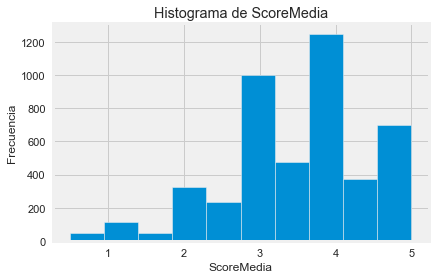

In [51]:
# Realizar un histograma de la columna "ScoreMedia":

plt.hist(df["ScoreMedia"], bins=10)
plt.title("Histograma de ScoreMedia")
plt.xlabel("ScoreMedia")
plt.ylabel("Frecuencia")
plt.show()

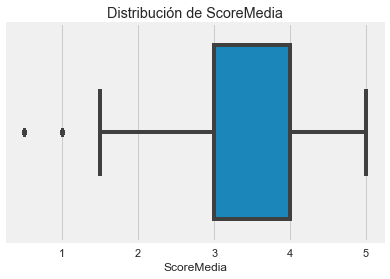

In [53]:
#Graficar la distribución de la columna "ScoreMedia" utilizando un boxplot:

sns.boxplot(x=df["ScoreMedia"])
plt.title("Distribución de ScoreMedia")
plt.xlabel("ScoreMedia")
plt.show()

In [55]:
# Calcular la correlación entre la columna "ScoreMedia" y otras columnas del dataframe:

correlations = df.corr()["ScoreMedia"].sort_values(ascending=False)
print(correlations)

ScoreMedia      1.000000
index           0.026386
duration_int    0.006579
release_year   -0.004095
userId         -0.038244
Name: ScoreMedia, dtype: float64


## EDA AÑO

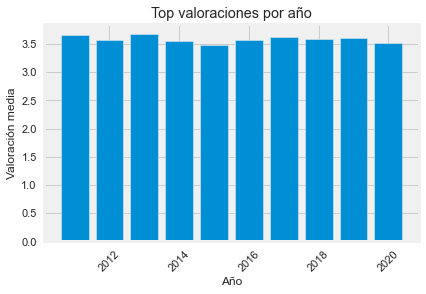

In [59]:
# Agrupamos los datos por año y calculamos la media de las valoraciones
df_yearly = df.groupby("release_year")["ScoreMedia"].mean()

# Ordenamos los datos por valor de las valoraciones
df_yearly = df_yearly.sort_values(ascending=False)

# Tomamos las 10 mejores valoraciones por año
df_top = df_yearly.head(10)

# Creamos la gráfica de barras
plt.bar(df_top.index, df_top.values)

# Configuramos la gráfica
plt.title("Top valoraciones por año")
plt.xlabel("Año")
plt.ylabel("Valoración media")
plt.xticks(rotation=45)

# Mostramos la gráfica
plt.show()


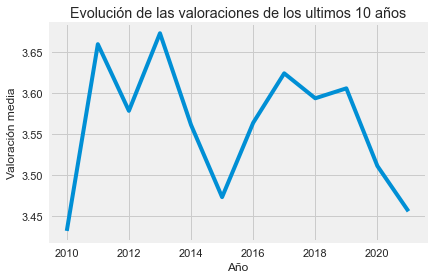

In [62]:
# Agrupamos los datos por año y calculamos la media de las valoraciones
df_yearly = df.groupby("release_year")["ScoreMedia"].mean()

# Ordenamos los datos por año
df_yearly = df_yearly.sort_index()

# Creamos la gráfica de línea
plt.plot(df_yearly.index, df_yearly.values)

# Configuramos la gráfica
plt.title("Evolución de las valoraciones de los ultimos 10 años")
plt.xlabel("Año")
plt.ylabel("Valoración media")

# Mostramos la gráfica
plt.show()


In [64]:
# Cantidad de peliculas por año

movies_per_year = df["release_year"].value_counts()
movies_per_year

2017    683
2018    675
2016    603
2019    562
2020    482
2015    370
2014    275
2013    213
2012    189
2021    175
2011    168
2010    165
Name: release_year, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

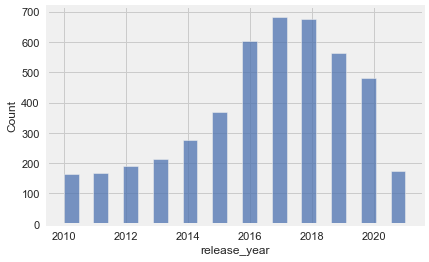

In [68]:
# Distribución de las películas por año:

sns.histplot(df, x="release_year")

## EDA - DIRECTOR

In [72]:
# Peliculas por director

movies_per_director = df["director"].value_counts()
movies_per_director

raúl campos, jan suter    18
jay karas                 15
marcus raboy              15
jay chapman               12
cathy garcia-molina       11
                          ..
lana wilson                1
david oelhoffen            1
ramesh sippy               1
vir das, ajay bhuyan       1
mozez singh                1
Name: director, Length: 3581, dtype: int64

<AxesSubplot:xlabel='director', ylabel='Count'>

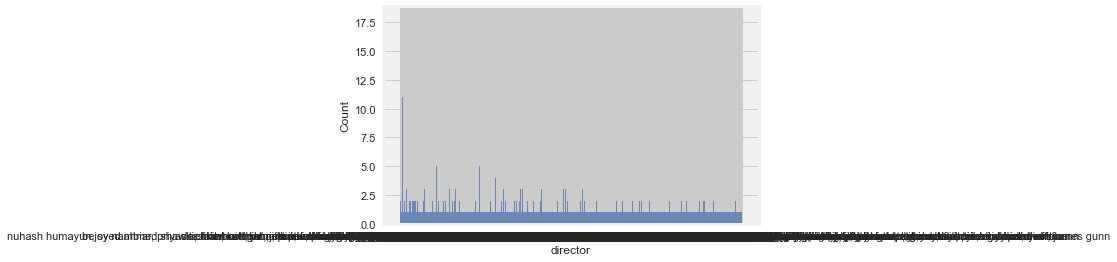

In [73]:
# Distribucion de peliculas por director

sns.histplot(df, x="director")

<AxesSubplot:xlabel='count', ylabel='mean'>

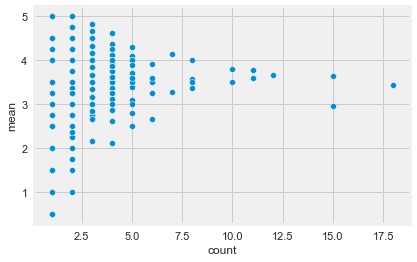

In [74]:
# Relación entre la cantidad de películas dirigidas por cada director y su promedio de valoraciones:

director_stats = df.groupby("director")["ScoreMedia"].agg(["mean", "count"])
sns.scatterplot(data=director_stats, x="count", y="mean")

In [81]:
# Top 5 de los directores con la mayor valoración media:

director_stats = df.groupby("director")["ScoreMedia"]
top_directors_by_rating = director_stats.nlargest(5)
top_directors_by_rating.head()

director              
a. l. vijay      17728    5.0
                 20269    2.0
a. raajdheep     16580    4.0
a.r. murugadoss  18872    3.0
aadish keluskar  17793    2.0
Name: ScoreMedia, dtype: float64

In [80]:
# Top 5 de los directores con mayor cantidad de películas:

top_directors_by_movie_count = df["director"].value_counts().nlargest(5)
top_directors_by_movie_count

raúl campos, jan suter    18
jay karas                 15
marcus raboy              15
jay chapman               12
cathy garcia-molina       11
Name: director, dtype: int64

In [82]:
# Top 5 de los directores con la mayor varianza en la valoración media de sus películas:

director_stats = df.groupby("director")["ScoreMedia"].agg(["mean", "std"]).fillna(0)
director_stats["std_mean_ratio"] = director_stats["std"] / director_stats["mean"]
top_directors_by_std_mean_ratio = director_stats.nlargest(5, "std_mean_ratio")
top_directors_by_std_mean_ratio

,mean,std,std_mean_ratio
director,,,
stuart gillard,2.75,3.181981,1.157084
david paul meyer,2.25,2.474874,1.099944
girish malik,2.25,2.474874,1.099944
james gunn,2.25,2.474874,1.099944
john stockwell,2.25,2.474874,1.099944


## EDA - GENERO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


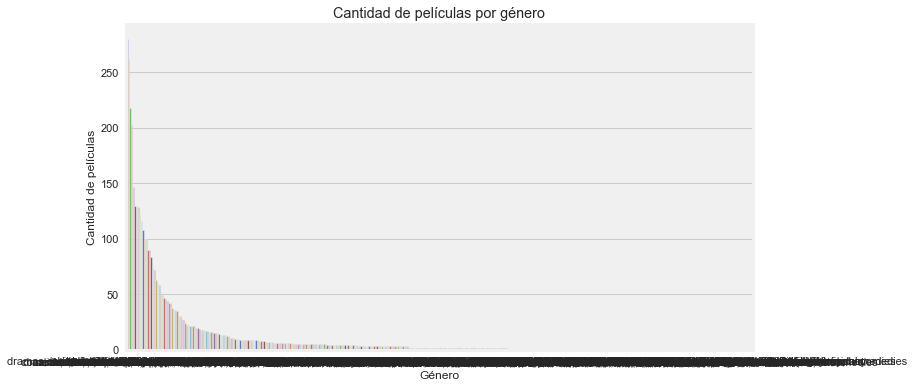

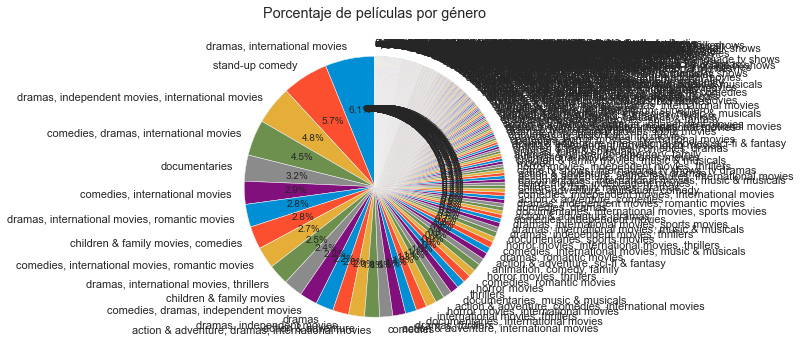

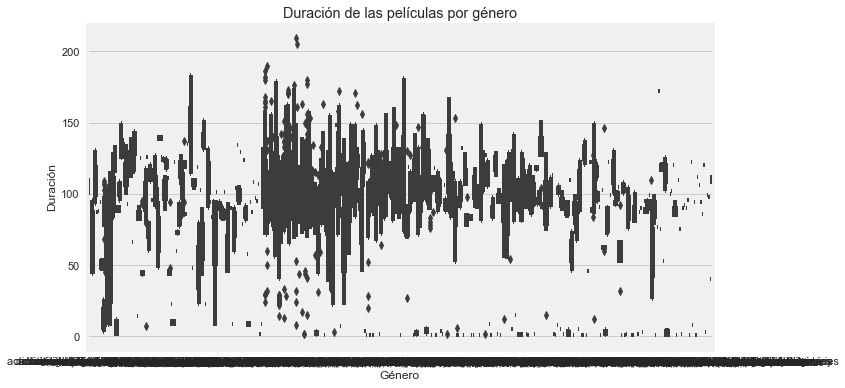

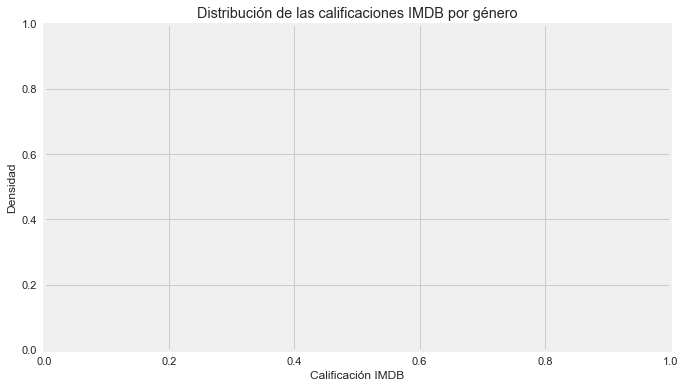

In [86]:
# Contar la cantidad de películas por género
genre_counts = df["listed_in"].value_counts()

# Mostrar un gráfico de barras con los conteos de películas por género
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="muted")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.title("Cantidad de películas por género")

# Mostrar un gráfico de pastel con los porcentajes de películas por género
plt.figure(figsize=(10,6))
plt.pie(genre_counts.values, labels=genre_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de películas por género")

# Mostrar un gráfico de caja y bigotes con la duración de las películas por género
plt.figure(figsize=(10,6))
sns.boxplot(x=df["listed_in"], y=df["duration_int"], palette="muted")
plt.xlabel("Género")
plt.ylabel("Duración")
plt.title("Duración de las películas por género")

# Mostrar un gráfico de densidad con la distribución de las calificaciones por género
plt.figure(figsize=(10,6))
sns.kdeplot(df.loc[df["listed_in"]=="Drama", "ScoreMedia"], label="Drama", shade=True)
sns.kdeplot(df.loc[df["listed_in"]=="Comedy", "ScoreMedia"], label="Comedia", shade=True)
sns.kdeplot(df.loc[df["listed_in"]=="Acción", 'ScoreMedia'], label="Acción", shade=True)
plt.xlabel("Calificación IMDB")
plt.ylabel("Densidad")
plt.title("Distribución de las calificaciones IMDB por género")
plt.legend()
